# Subplots and Enumeration - Lab

## Introduction

In this lab, we'll get some practice creating **_subplots_**, and explore how we can use the `enumerate` keyword to make creating them a bit easier!

## Objectives

You will be able to:

* Use python's `enumerate` keyword for lists where we also to access the index
* Create basic subplots with matplotlib
* Use `enumerate` to write effective, pythonic code when creating subplots

## Getting Started

For this lab, we'll explore a dataset containing yearly population data about different countries and regions around the globe. Let's start by importing the dataset so we can get to work.

In the cell below: 

* Import pandas and set the standard alias of `pd`
* Import the `pyplot` module from `matplotlib` and set the standard alias of `plt`
* Set matplotlib visualizations to appear inline with the command `%matplotlib inline`

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

/opt/conda/envs/learn-env/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 216, got 192
  return f(*args, **kwds)


Now, let's import the dataset. 

In the cell below:

* Use pandas to read in the data stored in the file `population.csv`.
* Print the head of the dataframe to ensure everything loaded correctly and get a feel for what this dataset contains. 

In [3]:
df = pd.read_csv("population.csv")
df.head()

,Country Name,Country Code,Year,Value
0,Arab World,ARB,1960,92490932.0
1,Arab World,ARB,1961,95044497.0
2,Arab World,ARB,1962,97682294.0
3,Arab World,ARB,1963,100411076.0
4,Arab World,ARB,1964,103239902.0


In [12]:
organized_df = df.set_index(["Country Name","Country Code","Year"])

Our columns look fairly standard. Let's take a look at the `value_counts()` of the `'country_name'` column to get a feel for how many years there are per country. 

Do this now in the cell below. 

In [26]:
organized_df.index.unique(level=2)

Int64Index([1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970,
            1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981,
            1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992,
            1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003,
            2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014,
            2015, 2016],
           dtype='int64', name='Year')

## Groupings and Subplots

When creating subplots, it makes sense that we'll usually want the plots to contain data that is related to one another, so that the subplots will make it easy to visually compare and see trends or patterns. The easiest way to do this is to group our data by the types of information we're most interested in seeing. For this dataset, that means that we can group by `'Country Name'`, by `'Country Code'`, or by `'Year'`. Let's start by grouping by name.

For our first subplot, we'll create 1 row containing 2 subplots. Let's start by getting some data for each of our plots. We'll start by getting some data to plot.  We'll do this by slicing data for the USA and Canada and storing them in separate variables. 

In the cell below:

* Slice all the rows for '`United States`' and store them in the appropriate variable. 
* Slice all the rows for '`Canada`' and store them in the appropriate variable. 
* Inspect the `.head()` of each to ensure that we grabbed the data correctly. 

In [30]:
usa = df[df["Country Name"]=="United States"]


canada = df[df["Country Name"]=="Canada"]

usa.head()

,Country Name,Country Code,Year,Value
14288,United States,USA,1960,180671000.0
14289,United States,USA,1961,183691000.0
14290,United States,USA,1962,186538000.0
14291,United States,USA,1963,189242000.0
14292,United States,USA,1964,191889000.0


Now that we have our data ready to go, lets go ahead and create a basic subplot. For our first batch of subplots, we'll use the quick way by making use of `plt.subplot()` and passing in the number of rows, number of columns, and the number of the subplot that we want to create. Then, we'll create our plot by passing in the corresponding data. 

When we call `plt.subplot()`, it will return an `ax` (short for 'axis') object that corresponds to the 3rd parameter we pass in--the actual plot we will want to create. To create subplots on the fly with this method, we'll:

1. Get the `ax` object for the first plot  in the subplot we want to create. Store this in the variable `ax1`.
2. Call `.plot()` on the `usa` DataFrame, and specify the following parameters:
    * `x='Year'`
    * `y='Value'`
    * `ax=ax1`
3. Use the `ax1` object's methods to do any labeling we find necessary.
4. Repeat the process for `canada` with the second plot. Store this axis in `ax2`.  

Do this now in the cell below. 

Text(0.5, 1.0, 'Canada')

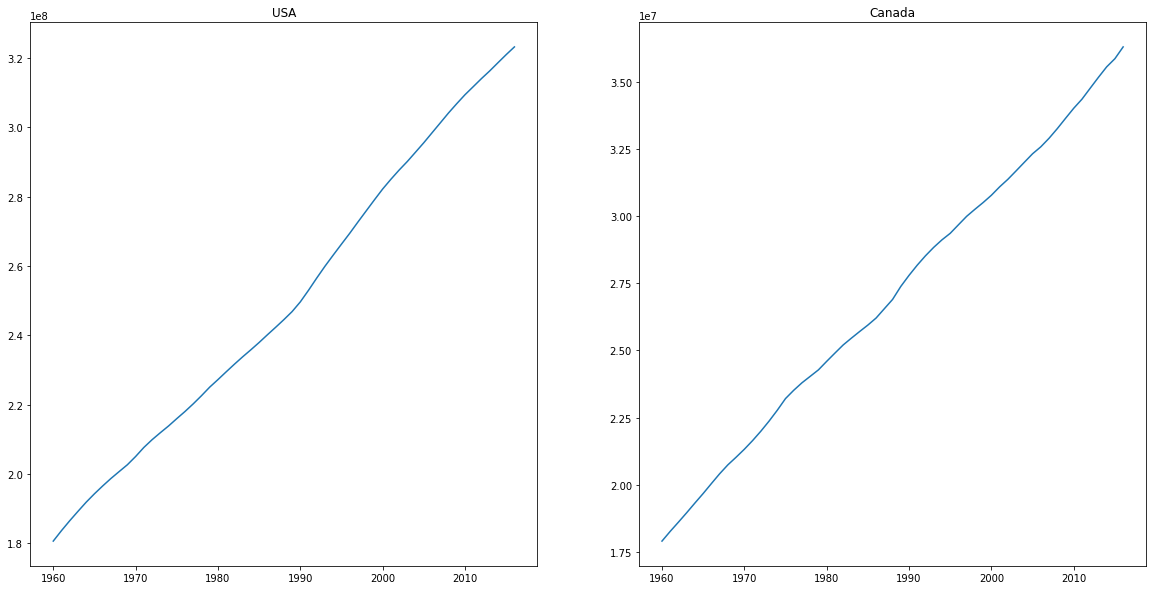

In [32]:
fig, axes = plt.subplots(ncols=2,nrows=1)
fig.set_figheight(10)
fig.set_figwidth(20)
ax1 = axes[0]
ax1.plot(usa.Year,usa.Value)
ax1.set_title("USA")

ax2 = axes[1]
ax2.plot(canada.Year,canada.Value)
ax2.set_title("Canada")


Our plots look pretty good, but they're a bit squished together, and the plots themselves are much too small, which squishes the axis values.  Both of these problems have an easy fix. We'll begin by using `plt.figure()` and passing in a larger `figsize` of `(20, 10)` to tell matplotlib we want the full subplot to be 20 inches by 10.  

We can fix the spacing quite easily by using `plt.subplots_adjust()` and changing the amount of space in between our plots. The [documentation for `subplots_adjust`](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.subplots_adjust.html) tells us that the parameter we need to adjust is `wspace`. This is set to `0.2` by default, meaning that the amount of space between our plots is equal to 20% of the width of the plots. Let's set `wspace=0.4`, and see how that looks.

In the cell below: 

* Call `plt.figure()` and use the `figsize` parameter to set the size of the total subplot to 20 inches wide by 10 inches tall. Remember to pass these values in as a tuple, with width first and height second. 
* Copy the visualization code from the cell above into the cell below. 
* After setting the title for the Canada plot, add the line `plt.subplots_adjust()` and pass in the parameter `wspace=0.4`.

Much better!

Next, we'll see some advanced methods for creating subplots. But, before we do that, let's take a brief detour and learn about the `enumerate` keyword!

## Using `enumerate()`

Python's `enumerate()` keyword is a special type of for loop. It works just like a regular for-loop, with 1 major difference--instead of just returning the next object with each iteration of the loop, it also returns the index of the object from the collection we're looping through! 

Run the example code in the cell below, and examine the output. That should make it clear what is happening. 

In [ ]:
sample_list = ['foo', 'bar', 'baz']

for index, value in enumerate(sample_list):
    print("Index: {}      Value: {}".format(index, value))    

The `enumerate` keyword is extremely helpful anytime we're iterating over and object and want to reference the index of the current iteration. Let's try an example.

In the cell below: 
* `enumerate()` through `sample_list_2` in the cell below
* For any item in `sample_list_2`, append it to the `odds` list if it's index is an odd number. 
* Once the loop has finished, print `odds`.

In [34]:
sample_list_2 = ['item at Index ' + str(i) for i in range(10)]

odds=[]
for key,val in enumerate(sample_list_2):
    if key%2>0:
        odds.append(val)


# Write your code below this line



# Write your code above this line

odds
# Expected Output: 
# ['item at Index 1',
#  'item at Index 3',
#  'item at Index 5',
#  'item at Index 7',
#  'item at Index 9']

['item at Index 1',
 'item at Index 3',
 'item at Index 5',
 'item at Index 7',
 'item at Index 9']

In [38]:
grouped_df = df.groupby('Country Name')
for x,y in enumerate(grouped_df):
    print(f"x={x}y={y}")
    
    

x=0y=('Afghanistan',      Country Name Country Code  Year       Value
2622  Afghanistan          AFG  1960   8996351.0
2623  Afghanistan          AFG  1961   9166764.0
2624  Afghanistan          AFG  1962   9345868.0
2625  Afghanistan          AFG  1963   9533954.0
2626  Afghanistan          AFG  1964   9731361.0
2627  Afghanistan          AFG  1965   9938414.0
2628  Afghanistan          AFG  1966  10152331.0
2629  Afghanistan          AFG  1967  10372630.0
2630  Afghanistan          AFG  1968  10604346.0
2631  Afghanistan          AFG  1969  10854428.0
2632  Afghanistan          AFG  1970  11126123.0
2633  Afghanistan          AFG  1971  11417825.0
2634  Afghanistan          AFG  1972  11721940.0
2635  Afghanistan          AFG  1973  12027822.0
2636  Afghanistan          AFG  1974  12321541.0
2637  Afghanistan          AFG  1975  12590286.0
2638  Afghanistan          AFG  1976  12840299.0
2639  Afghanistan          AFG  1977  13067538.0
2640  Afghanistan          AFG  1978  13237734.0

x=59y=('Dominican Republic',             Country Name Country Code  Year       Value
5814  Dominican Republic          DOM  1960   3294042.0
5815  Dominican Republic          DOM  1961   3406299.0
5816  Dominican Republic          DOM  1962   3521278.0
5817  Dominican Republic          DOM  1963   3638628.0
5818  Dominican Republic          DOM  1964   3757956.0
5819  Dominican Republic          DOM  1965   3878948.0
5820  Dominican Republic          DOM  1966   4001375.0
5821  Dominican Republic          DOM  1967   4125109.0
5822  Dominican Republic          DOM  1968   4250025.0
5823  Dominican Republic          DOM  1969   4376054.0
5824  Dominican Republic          DOM  1970   4503114.0
5825  Dominican Republic          DOM  1971   4631114.0
5826  Dominican Republic          DOM  1972   4759934.0
5827  Dominican Republic          DOM  1973   4889436.0
5828  Dominican Republic          DOM  1974   5019473.0
5829  Dominican Republic          DOM  1975   5149935.0
5830  Dominican Rep

x=136y=('Liberia',      Country Name Country Code  Year      Value
8941      Liberia          LBR  1960  1120313.0
8942      Liberia          LBR  1961  1144986.0
8943      Liberia          LBR  1962  1170480.0
8944      Liberia          LBR  1963  1196890.0
8945      Liberia          LBR  1964  1224344.0
8946      Liberia          LBR  1965  1252972.0
8947      Liberia          LBR  1966  1282814.0
8948      Liberia          LBR  1967  1313941.0
8949      Liberia          LBR  1968  1346491.0
8950      Liberia          LBR  1969  1380637.0
8951      Liberia          LBR  1970  1416529.0
8952      Liberia          LBR  1971  1454198.0
8953      Liberia          LBR  1972  1493711.0
8954      Liberia          LBR  1973  1535229.0
8955      Liberia          LBR  1974  1578952.0
8956      Liberia          LBR  1975  1625013.0
8957      Liberia          LBR  1976  1672300.0
8958      Liberia          LBR  1977  1720489.0
8959      Liberia          LBR  1978  1771256.0
8960      Liberia    

x=191y=('Poland',       Country Name Country Code  Year       Value
11449       Poland          POL  1960  29637450.0
11450       Poland          POL  1961  29964000.0
11451       Poland          POL  1962  30308500.0
11452       Poland          POL  1963  30712000.0
11453       Poland          POL  1964  31139450.0
11454       Poland          POL  1965  31444950.0
11455       Poland          POL  1966  31681000.0
11456       Poland          POL  1967  31987155.0
11457       Poland          POL  1968  32294655.0
11458       Poland          POL  1969  32548300.0
11459       Poland          POL  1970  32664300.0
11460       Poland          POL  1971  32783500.0
11461       Poland          POL  1972  33055650.0
11462       Poland          POL  1973  33357200.0
11463       Poland          POL  1974  33678899.0
11464       Poland          POL  1975  34015199.0
11465       Poland          POL  1976  34356300.0
11466       Poland          POL  1977  34689050.0
11467       Poland          POL 

x=246y=('Uganda',       Country Name Country Code  Year       Value
14060       Uganda          UGA  1960   6788214.0
14061       Uganda          UGA  1961   7006633.0
14062       Uganda          UGA  1962   7240174.0
14063       Uganda          UGA  1963   7487429.0
14064       Uganda          UGA  1964   7746198.0
14065       Uganda          UGA  1965   8014401.0
14066       Uganda          UGA  1966   8292776.0
14067       Uganda          UGA  1967   8580676.0
14068       Uganda          UGA  1968   8872920.0
14069       Uganda          UGA  1969   9162833.0
14070       Uganda          UGA  1970   9446064.0
14071       Uganda          UGA  1971   9720399.0
14072       Uganda          UGA  1972   9988380.0
14073       Uganda          UGA  1973  10256429.0
14074       Uganda          UGA  1974  10533716.0
14075       Uganda          UGA  1975  10827147.0
14076       Uganda          UGA  1976  11139833.0
14077       Uganda          UGA  1977  11470867.0
14078       Uganda          UGA 

Great! There are plenty of situations where `enumerate()` comes in very handy. One example is when generating subplots.

## Enumerating with Subplots

To end this lab, we'll see how we can use `enumerate` to easily subplot this entire dataframe by country--all 263 of them!

It will work like this. We'll begin by grouping each row in our DataFrame by `'Country Name'`. Then, we'll create a `plt.figure()` and set the figure size to `(20,40)`. We'll also set the `facecolor` to `'white'`, so that it's a bit easier to read. 

Then comes the fun part. We'll enumerate through our grouped DataFrame. Just looping through a grouped DataFrame returns a tuple containing the index and the rows with that country name. Since we're grouped by `"Country Name"`, this means that the index will actually be the `'Country Name'`. However, we're not just looping through the grouped DataFrame--we're `enumerate`-ing through it! 

```python
for index, (value1, value2) in enumerate(grouped_DataFrame):
    # index is an integer, starting at 0 and counting up by 1 just 
    # like we would expect a for loop to do
    
    #(value1, value2) is a tuple containing the name of the country as value 1
    # (since it is acting as the index because we grouped everything by it),
    # and value 2 is all the rows that belong to that country's group. 
    
```

This means that the `index` for our enumeration will be an integer value that counts higher by 1 with each country. If we just add 1 to it (because subplots start counting at 1, but python starts counting at 0), then this number will correspond with the index we need to pass in as the third parameter in `plt.subplot()`--the parameter that specifies which plot inside the subplot should show the plot we're about to create. 

Don't worry if this seems confusing--the code below has been commented to help you. 

In [ ]:
# Group the DataFrame by Country Name--this line has been provided for you
grouped_df = df.groupby('Country Name')

# pass in figsize=(20,40), and also set the facecolor parameter to 'white'
plt.figure(figsize=None, facecolor=None)

# Complete the line below so that the first loop variable is the called index,
# and the second loop variable is the tuple (countryname, population). 
for None, None in enumerate(grouped_df):
    
    # Get the unique subplot where the plot we're creating during this iteration
    # of the loop will live. Our subplot will be 30 rows of 9 plots each. 
    # Set the third value to be index+1
    ax = plt.subplot(30, 9, None)
    
    # Complete the line to create the plot for this subplot. 
    # Same visualizations as we created above!
    population.plot(x=None, y=None, ax=None, legend=False)
    
    # Set the title of each plot, so we know which country it represents
    ax.set_title(None)


Great job! Being able to effectively create subplots with matplotlib is a solid data visualization skill to have--and using `enumerate()` makes our code that much simpler!

## Summary

In this lab, we learned how to create advanced subplots using `enumerate()` on grouped DataFrames!